### Latin American Collections: Subject Themes

This notebook looks at subject themes across MEAP's Latin American Collections, both as a whole and individually. Scroll down to the visualization to learn more!

In [1]:
# first import necessary libraries
import pandas as pd  
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# import collection data file
themes_csv = pd.read_csv('/data/meap_subject_themes.csv')

In [3]:
themes_csv['Translated'] = themes_csv['Translated'].str.lower()
themes_csv['Translated'] = themes_csv['Translated'].astype(str)

In [31]:
themes_string = ' | ~ | '.join(themes_csv['Translated'])
themes_string = themes_string.replace(" | ~ | ", "| ~ |")
themes_list = themes_string.split('| ~ |')

In [41]:
word_count = Counter(themes_list).most_common()
word_count.pop(7)

('', 190)

In [42]:
# dataframe for subject themes
df = pd.DataFrame.from_records(word_count, columns=['Subject Theme', 'Count'])

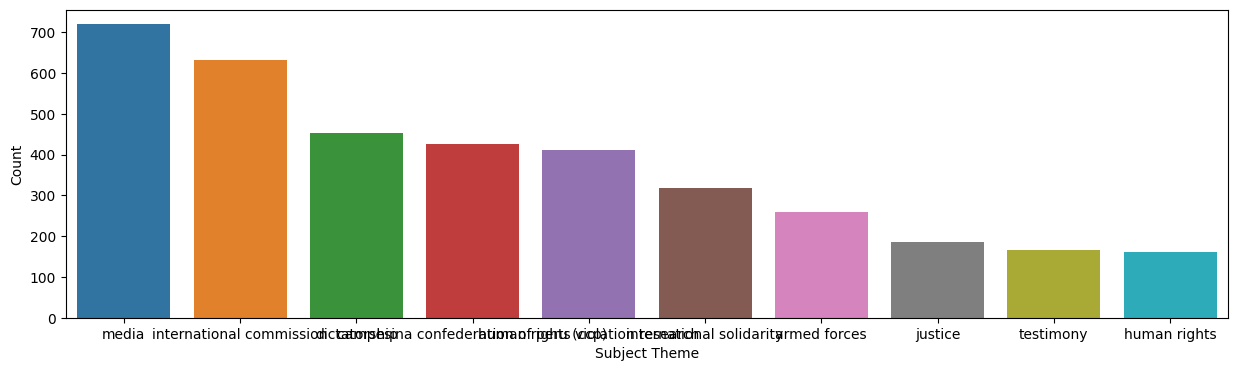

In [43]:
df = df.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(15,4))
ax = sns.barplot(data=df, x= "Subject Theme", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Not super easy to read with Seaborn. Let's try the plotly data visualization library instead! 

In [44]:
fig = px.bar(df, x='Subject Theme', y='Count', title='Most Common Subject Themes in Latin American Collections')
fig.show()

Now let's breakdown subject themes for individual collections. I'll do so by subsetting the main dataframe into collection-specific dataframes.

Steps: subset original dataframe, then get subject themes

In [69]:
# make a list of all Latin American collections
collections_list1 = ['Centro Cultural Tallersol (Chile)', 'Archive of Confederación Campesina del Perú (CCP)', 'MMDH']

collections_list2 = ['Ibicaba Farm Records', 'memoria-abierta', 'Obidos Court Records metadata']

In [74]:
# create a for loop to create visualizations for each collection
for dataset in collections_list1:
    collection_df = themes_csv.loc[themes_csv['Collection'] == dataset]

    # get subject themes into string list
    themes_string = ' | ~ | '.join(collection_df['Translated'])
    themes_string = themes_string.replace(" | ~ | ", "| ~ |")
    themes_list = themes_string.split('| ~ |')
    word_count = Counter(themes_list).most_common()

    # create new dataframe for subject themes
    # dataframe for subject themes
    df = pd.DataFrame.from_records(word_count, columns=['Subject Theme', 'Count'])

    # filter out nan/invalid values
    df = df[df['Subject Theme'] != 'nan']
    df = df[df['Subject Theme'] != '']

    # get top 10 most common subject themes
    df = df.nlargest(columns="Count", n = 10) 

    # graph the results
    fig = px.bar(df, x='Subject Theme', y='Count', title='Most Common Subject Themes in ' + dataset)
    fig.show()


In [79]:
# create a for loop to create visualizations for each collection
for dataset in collections_list2:
    collection_df = themes_csv.loc[themes_csv['Collection'] == dataset]

    # get subject themes into string list
    themes_string = '|~|'.join(collection_df['Translated'])
    themes_string = themes_string.replace('--', '|~|')
    themes_list = themes_string.split('|~|')
    word_count = Counter(themes_list).most_common()

    # create new dataframe for subject themes
    # dataframe for subject themes
    df = pd.DataFrame.from_records(word_count, columns=['Subject Theme', 'Count'])

    # filter out nan/invalid values
    df = df[df['Subject Theme'] != 'nan']
    df = df[df['Subject Theme'] != '']

    # get top 10 most common subject themes
    df = df.nlargest(columns="Count", n = 10) 

    # graph the results
    fig = px.bar(df, x='Subject Theme', y='Count', title='Most Common Subject Themes in ' + dataset)
    fig.show()


### Conclusions

- Subject themes are mostly specific to each Latin American collection.
- Most common subject themes are related to the geographical region where the collection is from.
- History is a common theme among most collections.